This has given us an Accuracy 99.75%

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [64]:
# importing tensorflow and keras
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [65]:
# setting up the layers of neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(102,)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

/home/user/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [66]:
# compiling the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Dataset**

In [67]:
ds = pd.read_csv('/home/user/Desktop/Lending Club/non_null_output.csv')

In [68]:
ds.shape

(614640, 103)

Separating Data and Label

In [69]:
X = ds.drop(columns = 'loan_status', axis = 1)
Y = ds['loan_status']

Test and Training Data Split

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=1)
len(X_train)

491712

Standardizing the Data

In [71]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
len(X_train_std)

491712

Neural Network

In [73]:
history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13830/13830 ━━━━━━━━━━━━━━━━━━━━ 11s 774us/step - accuracy: 0.9789 - loss: 0.0596 - val_accuracy: 0.9953 - val_loss: 0.0152
Epoch 2/10
13830/13830 ━━━━━━━━━━━━━━━━━━━━ 11s 762us/step - accuracy: 0.9955 - loss: 0.0152 - val_accuracy: 0.9960 - val_loss: 0.0134
Epoch 3/10
13830/13830 ━━━━━━━━━━━━━━━━━━━━ 10s 751us/step - accuracy: 0.9965 - loss: 0.0120 - val_accuracy: 0.9964 - val_loss: 0.0122
Epoch 4/10
13830/13830 ━━━━━━━━━━━━━━━━━━━━ 11s 758us/step - accuracy: 0.9970 - loss: 0.0103 - val_accuracy: 0.9968 - val_loss: 0.0108
Epoch 5/10
13830/13830 ━━━━━━━━━━━━━━━━━━━━ 11s 759us/step - accuracy: 0.9973 - loss: 0.0095 - val_accuracy: 0.9973 - val_loss: 0.0101
Epoch 6/10
13830/13830 ━━━━━━━━━━━━━━━━━━━━ 11s 759us/step - accuracy: 0.9975 - loss: 0.0088 - val_accuracy: 0.9971 - val_loss: 0.0101
Epoch 7/10
13830/13830 ━━━━━━━━━━━━━━━━━━━━ 11s 779us/step - accuracy: 0.9977 - loss: 0.0081 - val_accuracy: 0.9972 - val_loss: 0.0099
Epoch 8/10
13830/13830 ━━━━━━━━━━━━━━━━━━━━ 11s 770us/s

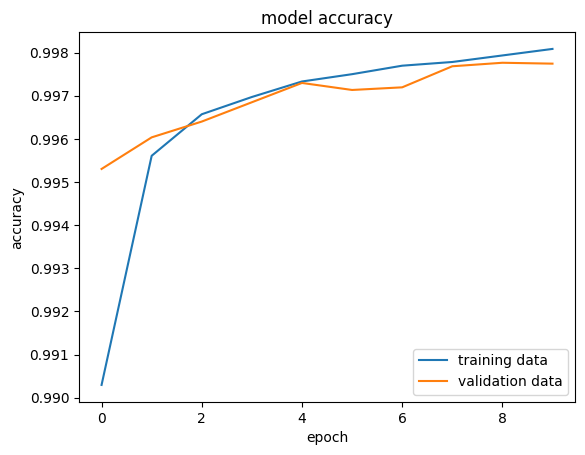

In [74]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

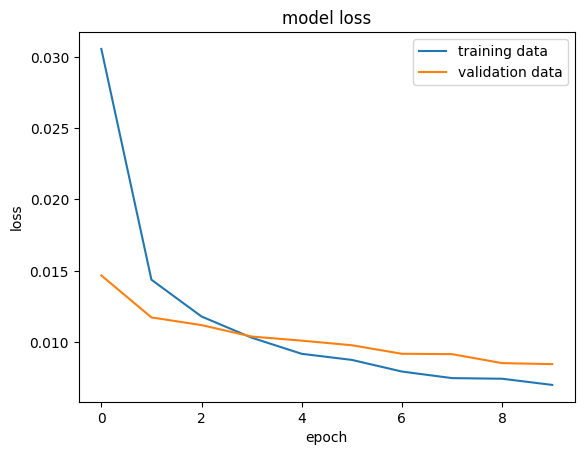

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

Accuracy of the model on test data

In [75]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(accuracy)
len(X_test_std)

3842/3842 ━━━━━━━━━━━━━━━━━━━━ 2s 581us/step - accuracy: 0.9976 - loss: 0.0083
0.9976001977920532


122928

In [12]:
print(X_test_std.shape)
print(X_test_std[0])

(122928, 102)
[ 7.23359349e-01 -1.56534034e+00 -1.56530161e+00 -1.56372988e+00
 -1.25436986e+00 -1.57869793e+00 -1.48414319e+00 -1.34405801e+00
 -3.31883691e-01 -1.04909813e+00 -3.39154906e-02 -1.34581028e+00
 -3.14541144e-02 -3.08126851e-01 -1.26143094e+00 -5.35096168e-01
 -3.64264303e-01  8.65838519e-01  8.65819015e-01  3.05959178e-01
 -6.72117780e-01 -3.05629971e-01 -3.58432058e-01 -4.73006461e-01
 -1.24668165e+00  2.07810100e+00  8.48191629e-01 -1.51640821e-01
 -1.51632354e-01 -1.18040152e+00 -1.17965000e+00 -1.01024823e+00
 -9.26848850e-01 -1.96228494e-01 -3.89166283e-01 -3.67469424e-01
 -4.55124455e-01  9.31722092e-01  6.53913803e-01 -1.20499243e-01
  0.00000000e+00 -1.62201612e-01 -6.50166635e-02 -1.21331212e-01
  2.85153425e+00  5.18278317e-01  8.76773642e-02  3.33190358e+00
  6.27059508e+00  1.10575907e-01  1.02069482e+00  9.51959950e-01
  5.30085636e-01 -8.32791136e-01 -8.21698055e-02  5.18667250e+00
 -3.46843720e-01  3.07349681e+00  4.63582796e+00  3.72322622e+00
  9.9502717

In [13]:
Y_pred_train = model.predict(X_train_std)
Y_pred_test = model.predict(X_test_std)
Y_pred = np.concatenate((Y_pred_test, Y_pred_train), axis=0)
len(Y_pred)
print(Y_pred)

15366/15366 ━━━━━━━━━━━━━━━━━━━━ 7s 460us/step
3842/3842 ━━━━━━━━━━━━━━━━━━━━ 2s 471us/step
[[6.02166280e-02 9.99700248e-01]
 [2.96448008e-03 9.99760389e-01]
 [1.00000000e+00 9.26339595e-22]
 ...
 [1.01717666e-01 9.99990880e-01]
 [1.00000000e+00 3.34914684e-23]
 [4.39127162e-02 9.99253154e-01]]


In [14]:
print(Y_pred.shape)
print(Y_pred[0])

(614640, 2)
[0.06021663 0.99970025]


In [17]:
print(len(Y_pred_labels))

614640


In [16]:
# converting the prediction probabilities to class labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)
len(Y_pred_labels)
ds['Given'] = Y_pred_labels
ds.to_csv('final_file.csv', index=False)

[1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 

In [ ]:
ds.columns.tolist()

['id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'total_bal_il',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_las

In [18]:
row_as_list = X_test.iloc[49].tolist()
print(row_as_list)

[118273130.0, 5000.0, 5000.0, 5000.0, 12.62, 167.56, 2.0, 10.0, 191371.0, 4.0, 25000.0, 0.0, 0.0, 4.0, 45.0, 11.58, 2.0, 690.0, 694.0, 0.0, 12.0, 7.0, 0.0, 136.0, 0.8, 27.0, 1.0, 0.0, 0.0, 5741.2598391276, 5741.26, 5000.0, 726.26, 15.0, 0.0, 0.0, 3368.15, 704.0, 700.0, 0.0, 1.0, 0.0, 0.0, 0.0, 138303.0, 1.0, 1.0, 1.0, 3.0, 131.0, 1.0, 5.0, 0.0, 1.0, 17000.0, 3.0, 0.0, 1.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 130.0, 141.0, 2.0, 2.0, 0.0, 3.0, 1.0, 0.0, 3.0, 4.0, 3.0, 6.0, 4.0, 6.0, 10.0, 4.0, 9.0, 0.0, 0.0, 0.0, 1.0, 100.0, 0.0, 0.0, 0.0, 12500.0, 0.0, 0.0, 0.0, 11.0, 2017.0, 6.0, 1990.0, 3.0, 2019.0, 3.0, 2019.0, 36.0]


In [50]:
# Get the weights of the model
weights = model.get_weights()

# Print the weights of the first layer
for i, layer in enumerate(model.layers):
    layer_weights = layer.get_weights()
    if len(layer_weights) > 0:
        # Save weights
        np.savetxt(f'layer_{i+1}_weights.csv', layer_weights[0], delimiter=',')
        # Save biases
        np.savetxt(f'layer_{i+1}_biases.csv', layer_weights[1], delimiter=',')


In [ ]:
# to get weights
coef = model.get_weights()
coef

[array([[-2.0930919e-01, -1.1518752e-01, -7.0998603e-01, ...,
         -5.9982026e-01,  8.0554098e-02,  5.8434248e-01],
        [-7.7531928e-01, -1.0672356e+00, -1.8167630e-01, ...,
          4.3267271e-01, -4.8684219e-01,  3.1370199e-01],
        [-7.6987445e-01, -8.2127053e-01, -5.1670516e-01, ...,
          2.9831889e-01, -9.3425733e-01,  6.8621939e-01],
        ...,
        [ 1.8233854e-01, -1.2645386e-01, -1.8028910e-01, ...,
          3.2074490e-01, -1.0527504e-01,  1.0082288e-01],
        [ 5.4751784e-01, -1.4534195e-01, -9.8681766e-01, ...,
          1.9871303e-01,  1.1356120e+00,  2.2129489e-03],
        [-3.4234741e-01, -5.3523052e-01, -1.9339553e-01, ...,
         -6.4913940e-05, -4.6566021e-01,  1.0642383e+00]], dtype=float32),
 array([-1.3426468 , -1.3593594 , -1.3418741 , -1.3538125 ,  1.6180062 ,
        -1.9054793 ,  0.72060275,  1.5312828 , -1.4580109 ,  0.8390352 ,
         1.2761904 ,  1.4668647 ,  1.406601  ,  1.549168  ,  1.3302548 ,
         0.8776416 , -1.4415033

In [77]:
input_data = [118273130.0, 5000.0, 5000.0, 5000.0, 12.62, 167.56, 2.0, 10.0, 191371.0, 4.0, 25000.0, 0.0, 0.0, 4.0, 45.0, 11.58, 2.0, 690.0, 694.0, 0.0, 12.0, 7.0, 0.0, 136.0, 0.8, 27.0, 1.0, 0.0, 0.0, 5741.2598391276, 5741.26, 5000.0, 726.26, 15.0, 0.0, 0.0, 3368.15, 704.0, 700.0, 0.0, 1.0, 0.0, 0.0, 0.0, 138303.0, 1.0, 1.0, 1.0, 3.0, 131.0, 1.0, 5.0, 0.0, 1.0, 17000.0, 3.0, 0.0, 1.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 130.0, 141.0, 2.0, 2.0, 0.0, 3.0, 1.0, 0.0, 3.0, 4.0, 3.0, 6.0, 4.0, 6.0, 10.0, 4.0, 9.0, 0.0, 0.0, 0.0, 1.0, 100.0, 0.0, 0.0, 0.0, 12500.0, 0.0, 0.0, 0.0, 11.0, 2017.0, 6.0, 1990.0, 3.0, 2019.0, 3.0, 2019.0, 36.0]
  
# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshaping the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

"""
prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('Bad Loan: The loan should not be given')

else:
  print('Good Loan: The loan should be given')
"""

# to select the 2nd col in a row : print(prediction[0, 1])

if (prediction[0, 1] >= 0.75):
    print("very good loan")
elif (prediction[0, 1] >= 0.5):
    print("good loan")
elif (prediction[0, 0] >= 0.75):
    print("very bad loan")
elif (prediction[0, 0] >= 0.5):
    print("bad loan")
elif (prediction[0, 1] > [0,0]):
    print("good loan")
else:
    print("bad loan")




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[[0.13048482 0.74645597]]
good loan


/home/user/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [53]:
import fitz  # PyMuPDF
import os
from groq import Groq

# Initialize the client with the API key
client = Groq(
    api_key='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',
)

# Path to the document
document_path = '/home/user/Desktop/Lending Club/loan-policy20 .pdf'

# Function to extract text from the PDF document with a character limit
def extract_text_from_pdf(file_path, char_limit=2000):
    document_text = ""
    with fitz.open(file_path) as doc:
        for page in doc:
            document_text += page.get_text()
            if len(document_text) >= char_limit:
                document_text = document_text[:char_limit]
                break
    return document_text

# Extract text from the document
document_text = extract_text_from_pdf(document_path)

# Get user input for the message content
user_input = input("Enter parameter values: ")

# Function to send the document content and user prompt in chunks
def send_in_chunks(document_text, user_input, chunk_size=1000):
    start = 0
    responses = []
    while start < len(document_text):
        chunk = document_text[start:start + chunk_size]
        combined_input = f"Document content:\n{chunk}\n\nUser prompt: {user_input}"
        chat_completion = client.chat.completions.create(
            messages=[
                {
                    "role": "user",
                    "content": combined_input,
                }
            ],
            model="llama3-8b-8192",
        )
        responses.append(chat_completion.choices[0].message.content)
        start += chunk_size
    return responses

# Send the document content and user prompt in chunks
# responses = send_in_chunks(document_text, user_input)

# Print the responses from the LLM
#for response in responses:
#    print(response)



In [25]:
print(user_input)

118273130.0, 5000.0, 5000.0, 5000.0, 12.62, 167.56, 2.0, 10.0, 191371.0, 4.0, 25000.0, 0.0, 0.0, 4.0, 45.0, 11.58, 2.0, 690.0, 694.0, 0.0, 12.0, 7.0, 0.0, 136.0, 0.8, 27.0, 1.0, 0.0, 0.0, 5741.2598391276, 5741.26, 5000.0, 726.26, 15.0, 0.0, 0.0, 3368.15, 704.0, 700.0, 0.0, 1.0, 0.0, 0.0, 0.0, 138303.0, 1.0, 1.0, 1.0, 3.0, 131.0, 1.0, 5.0, 0.0, 1.0, 17000.0, 3.0, 0.0, 1.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 130.0, 141.0, 2.0, 2.0, 0.0, 3.0, 1.0, 0.0, 3.0, 4.0, 3.0, 6.0, 4.0, 6.0, 10.0, 4.0, 9.0, 0.0, 0.0, 0.0, 1.0, 100.0, 0.0, 0.0, 0.0, 12500.0, 0.0, 0.0, 0.0, 11.0, 2017.0, 6.0, 1990.0, 3.0, 2019.0, 3.0, 2019.0, 36.0


At this stage, we have a variable "user_input" which contains all the parameters put in by the user. Now we have to apply NN on these parameters

In [45]:
# We had to convert the string user input, into floats
# Split the string by commas to get a list of strings
string_array = user_input.split(",")

# Convert the list of strings to a NumPy array of floats
float_array = np.array(string_array, dtype=float)

In [46]:
input_data = float_array
# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshaping the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

"""
prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('Bad Loan: The loan should not be given')

else:
  print('Good Loan: The loan should be given')
"""

# to select the 2nd col in a row : print(prediction[0, 1])

if (prediction[0, 1] >= 0.75):
    print("very good loan")
    nn_output = "very good loan"
elif (prediction[0, 1] >= 0.5):
    print("good loan")
    nn_output = "good loan"
elif (prediction[0, 0] >= 0.75):
    print("very bad loan")
    nn_output = "very bad loan"
elif (prediction[0, 0] >= 0.5):
    print("bad loan")
    nn_output = "bad loan"
elif (prediction[0, 1] > [0,0]):
    print("good loan")
    nn_output = "good loan"
else:
    print("bad loan")
    nn_output = "bad loan"


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[[0.09068917 0.9303321 ]]
very good loan


/home/user/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Final Code**

Combining all the previous code, this is the final code snippet which has to be run to get the desired result

In [82]:

import fitz  # PyMuPDF
import os
from groq import Groq

# Initialize the client with the API key
client = Groq(
    api_key='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',
)

# Path to the document
document_path = '/home/user/Desktop/Lending Club/loan-policy20 .pdf'

# Function to extract text from the PDF document with a character limit
def extract_text_from_pdf(file_path, char_limit=2000):
    document_text = ""
    with fitz.open(file_path) as doc:
        for page in doc:
            document_text += page.get_text()
            if len(document_text) >= char_limit:
                document_text = document_text[:char_limit]
                break
    return document_text

# Extract text from the document
document_text = extract_text_from_pdf(document_path)

# Get user input for the message content
user_input = input("Enter parameter values: ")


################################################
# We had to convert the string user input, into floats
# Split the string by commas to get a list of strings
string_array = user_input.split(",")

# Convert the list of strings to a NumPy array of floats
float_array = np.array(string_array, dtype=float)
#################################################

input_data = float_array
# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshaping the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

"""
prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('Bad Loan: The loan should not be given')

else:
  print('Good Loan: The loan should be given')
"""

# to select the 2nd col in a row : print(prediction[0, 1])

if (prediction[0, 1] >= 0.75):
    print("very good loan")
    nn_output = "very good loan"
elif (prediction[0, 1] >= 0.5):
    print("good loan")
    nn_output = "good loan"
elif (prediction[0, 0] >= 0.75):
    print("very bad loan")
    nn_output = "very bad loan"
elif (prediction[0, 0] >= 0.5):
    print("bad loan")
    nn_output = "bad loan"
elif (prediction[0, 1] > [0,0]):
    print("good loan")
    nn_output = "good loan"
else:
    print("bad loan")
    nn_output = "bad loan"



# Get additional text from the developer
additional_text = input("The parameters are given and the decision is also given. Explain the decision")

# Function to send the document content, user input, and nn_output in chunks
def send_in_chunks(document_text, user_input, nn_output, additional_text, chunk_size=1000):
    start = 0
    responses = []
    while start < len(document_text):
        chunk = document_text[start:start + chunk_size]
        combined_input = (
            f"Document content:\n{chunk}\n\nUser input: {user_input}\n\n"
            f"NN output: {nn_output}\n\nAdditional text: {additional_text}"
        )
        chat_completion = client.chat.completions.create(
            messages=[
                {
                    "role": "user",
                    "content": combined_input,
                }
            ],
            model="llama3-8b-8192",
        )
        responses.append(chat_completion.choices[0].message.content)
        start += chunk_size
    return responses

# Send the document content, user input, nn_output, and additional text in chunks
responses = send_in_chunks(document_text, user_input, nn_output, additional_text)

# Print the responses from the LLM
for response in responses:
    print(response)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/home/user/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[[0.13048482 0.74645597]]
good loan
It appears that the provided document is a loan policy document from The Janata Co-Operative Bank Ltd. in New Delhi, India. The document outlines the bank's policies and procedures for managing credit risk and lending to customers.

The provided numerical input values are likely a set of loan application details, including demographic information, credit scores, loan amount, interest rates, and repayment terms.

Based on the output "good loan," it can be inferred that the loan application has been deemed eligible and likely to be approved by the bank.
Based on the provided document content, I will analyze the input data and determine whether it meets the standards and criteria outlined in the loan policy document. Here's the breakdown:

1. Risk parameters and prudential limits:
	* Loan amount: 118273130.0 (well within the bank's lendable resources)
	* Interest rate: 12.62% ( reasonable and in line with market rates)
	* Loan tenor: Not specified, but 